In [ ]:
import pandas as pd                    # for preprocessing
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #for plotting

In [ ]:
# Importing dataset 
from google.colab import files          #as google colab library for importing dataset
  

uploaded = files.upload()
#uploading the data from local computer

import pandas as pd 
import io 
  
train=pd.read_csv(io.BytesIO(uploaded['train_u6.csv']))  # importing the data file
print(train)       # to print the data
#train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
#test = pd.read_csv('test.csv')


Saving train_u6.csv to train_u6.csv
      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [ ]:
print(train.describe())


       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  ...         600.00000      564.000000
mean       5403.459283        1621.245798  ...         342.00000        0.842199
std        6109.041673        2926.248369  ...          65.12041        0.364878
min         150.000000           0.000000  ...          12.00000        0.000000
25%        2877.500000           0.000000  ...         360.00000        1.000000
50%        3812.500000        1188.500000  ...         360.00000        1.000000
75%        5795.000000        2297.250000  ...         360.00000        1.000000
max       81000.000000       41667.000000  ...         480.00000        1.000000

[8 rows x 5 columns]


In [ ]:
# Converting the values to number
train['Dependents'].replace('3+', 3,inplace=True)
#test['Dependents'].replace('3+', 3,inplace=True)

In [ ]:
print(train[['Dependents']])

    Dependents
0            0
1            1
2            0
3            0
4            0
..         ...
609          0
610          3
611          1
612          2
613          0

[614 rows x 1 columns]


In [ ]:
# Handling Missing Values

# Check How many Null Values in each columns
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

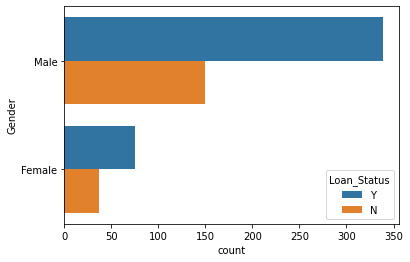

In [ ]:
sns.countplot(y ='Gender',hue = 'Loan_Status',data =train)

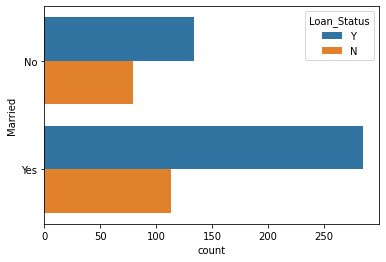

In [ ]:
sns.countplot(y ='Married',hue = 'Loan_Status',data =train)

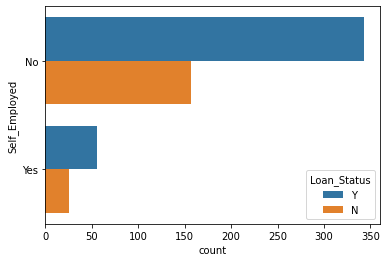

In [ ]:
sns.countplot(y ='Self_Employed',hue = 'Loan_Status',data =train)

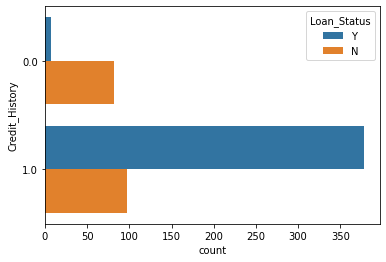

In [ ]:
sns.countplot(y ='Credit_History',hue = 'Loan_Status',data =train)

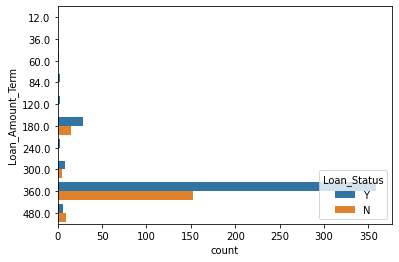

In [ ]:
sns.countplot(y ='Loan_Amount_Term',hue = 'Loan_Status',data =train)

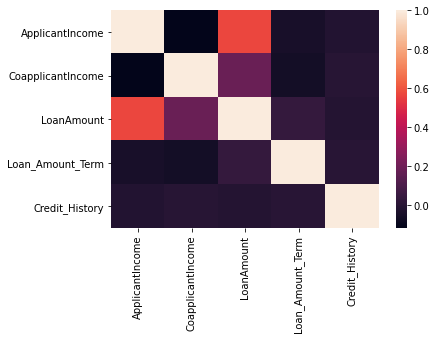

In [ ]:
sns.heatmap(train.corr())

In [ ]:
# Train Categorical Variables Missing values
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train ['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [ ]:
# Train Numerical Variables Missing Values
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
# Train Check if any Null Values Exits 
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


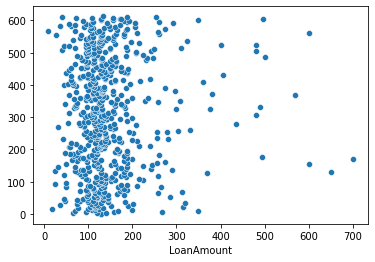

In [ ]:
sns.scatterplot(train['LoanAmount'],y=np.arange(0,614))

In [ ]:


# Outlier treatment 
train['LoanAmount'] = np.log(train['LoanAmount'])
#test['LoanAmount'] = np.log(test['LoanAmount'])




In [ ]:
print(train[['LoanAmount']])

     LoanAmount
0      4.852030
1      4.852030
2      4.189655
3      4.787492
4      4.948760
..          ...
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349

[614 rows x 1 columns]


In [ ]:


# Separting the Variable into Independent and Dependent 
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values



In [ ]:
# Converting Categorical variables into dummy 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.compose import ColumnTransformer

# Gender
X[:,0] = labelencoder_X.fit_transform(X[:,0])

# Marraige
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Education
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Self Employed
X[:,4] = labelencoder_X.fit_transform(X[:,4])

# Property Area
X[:,-1] = labelencoder_X.fit_transform(X[:,-1])


columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [ ]:
print(X)

[['0.0' '1.0' '0' ... '360.0' '1.0' '2']
 ['0.0' '1.0' '1' ... '360.0' '1.0' '0']
 ['0.0' '1.0' '1' ... '360.0' '1.0' '2']
 ...
 ['0.0' '1.0' '1' ... '360.0' '1.0' '2']
 ['0.0' '1.0' '1' ... '360.0' '1.0' '2']
 ['1.0' '0.0' '0' ... '360.0' '0.0' '1']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.47374983  0.47374983 -1.40561644 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787 -2.39291191
  -1.32007414]
 ...
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
   1.21674153]
 [ 2.11081869 -2.11081869  0.71143163 ...  0.26983787  0.41790088
  -0.05166631]]


In [ ]:
print(X_test)

[[-0.47374983  0.47374983 -1.40561644 ...  0.26983787  0.41790088
  -0.05166631]
 [ 2.11081869 -2.11081869 -1.40561644 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
   1.21674153]
 ...
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.47374983  0.47374983  0.71143163 ... -2.57737689 -2.39291191
   1.21674153]
 [-0.47374983  0.47374983  0.71143163 ...  0.26983787  0.41790088
   1.21674153]]


In [ ]:
# Fitting Logistic Regression to our training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y']


In [ ]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 18],
       [ 2, 88]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8373983739837398